(sec-chiCuadrado)=
# Chi-cuadrado $\chi^2$

En la {numref}`sec-minimosCuad`, con el fin de encontrar la línea que mejor se ajustaba a los datos $y_i$, correspondientes a una variable aleatoria de distribución normal con media $\mu_i$ y desviación estándar $\sigma_i$, se minimizó el funcional

$$ \chi^2 = \sum_{i=1}^N\frac{(y_i - \mu_{i})^2}{\sigma_i^2} .$$ (ec-chi1)

$\chi^2$ es una variable aleatoria con una función de densidad de probabilidad que nos permitirá determinar, de forma cuantitativa, si una hipótesis $H_0$ que llamaremos *hipótesis nula* debe ser rechazada o no[^H0]. En nuestro caso manejaremos dos tipos de hipótesis nulas: aquella que asegura que una distribución de datos se ajusta a una distribución en particular, o viceversa, y aquella que asegura que unos datos se ajustan a una función matemática particular, o viceversa.

**Nota**: el símbolo $\chi^2$ se escribe en español "chi-cuadrado", pero se pronuncia "qui-cuadrado". La verdad, es que se ha generalizado la pronunciación *chi-cuadrado*.

[^H0]: En principio, nunca estaremos $100\,\%$ seguros que la hipótesis es verdadera. Siempre existirá una probabildad, así sea ínfima, de que la hipótesis sea incorrecta.

(subsec-pdfChiCuadrado)=
## Función densidad de probabilidad chi-cuadrado

La función densidad de probabilidad de $\chi^2$ se define como

$$\large X(\chi^2;\nu) =  \frac{\chi^2{^{\big(\frac{\nu}{2} - 1\big)}} \exp\big( -\frac{\chi^2}{2} \big)}{2^{\frac{\nu}{2}} \Gamma(\frac{\nu}{2})} $$ (ec-chi2)

donde $\Gamma(x)$ es la función gamma, y $\nu$ es el número de grados de libertad. En la {numref}`fig-pdfChi` se puede observar la función densidad para los grados de libertad $\nu = 1, 4, 7, 10$. Se puede observar que la distribución de $\chi^2$ no es simétrica, y que tiene un sesgamiento hacia el cero que se hace más prominente para grados de libertad pequeños.

```{figure} imagenes/pdfChi.svg
:name: fig-pdfChi

Función densidad de probabilidad de $\chi^2$.
```

```{note}
Para replicar la {numref}`fig-pdfChi`, y cambiar los grados de libertad, se puede desplegar la siguiente pestaña.
```

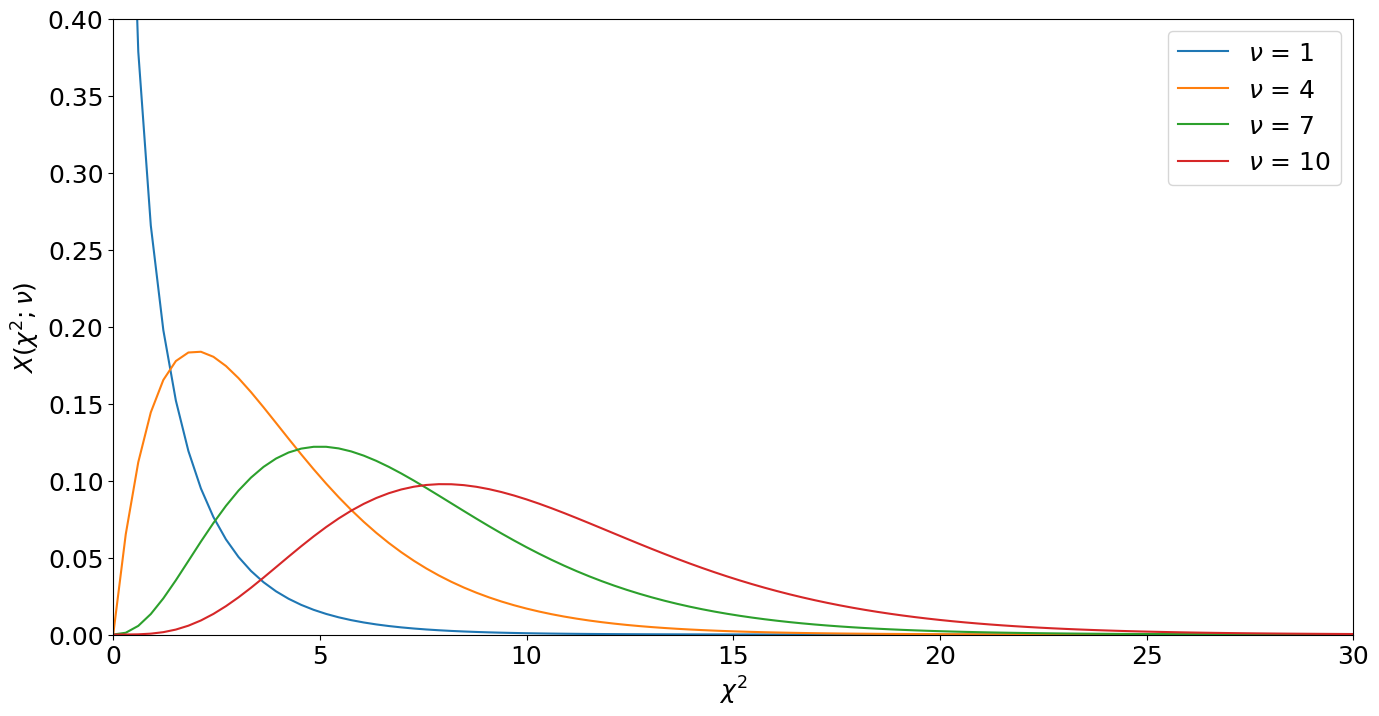

In [1]:
##### Definición de grados de libertad ####
num = 1    # grado de libertad menor
nuM = 11    # grado de libertad mayor
paso = 3
###########################################

import numpy as np
from scipy.special import gamma
import pylab as plt
plt.rcParams.update({'font.size':18})

def chiCuadrado(x2,nu):
    return x2**(nu/2-1)*np.exp(-x2/2)/(2**(nu/2)*gamma(nu/2))

nu = np.arange(num, nuM +1, paso).astype(int) 

fig, ax = plt.subplots(1,figsize=(16,8))
for ii in nu:
    xs = np.linspace(1e-18,30,100)
    ax.plot(xs,chiCuadrado(xs,ii),label=r'$\nu$ = {}'.format(ii))

ax.set_ylim(0,0.4)
ax.set_xlim(0,30)
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel(r'$X(\chi^2;\nu)$')
ax.legend()
plt.show()

De mayor interés para la verificación de un histograma[^bondad], o la calidad de un ajuste, es la determinación de la probabildidad acumulada de obtener un valor de $\chi^2$ mayor o igual a $\chi^2_{min}$:

[^bondad]:  También conocida como prueba de bondad de chi-cuadrado.

$$ P_{\nu}(\chi^2 \geq \chi^2_{min}) = \int_{\chi^2_{min}}^{\infty} X(\chi^2;\nu)\,d\chi^2 .$$ (ec-chi3)

En la {numref}`fig-pdfChiCum` se puede observar la probabilidad acumulada para los grados de libertad $\nu = 1, 4, 7, 10$. Note que para un mismo $\chi^2_{min}$ la probabilidad es mayor para grados de libertad mayores.


```{figure} imagenes/pdfChiCum.svg
:name: fig-pdfChiCum

Probabilidad acumulada de $\chi^2_{min}$.
```

```{note}
Para replicar la {numref}`fig-pdfChiCum` y cambiar los grados de libertad, se puede desplegar la siguiente pestaña.
```

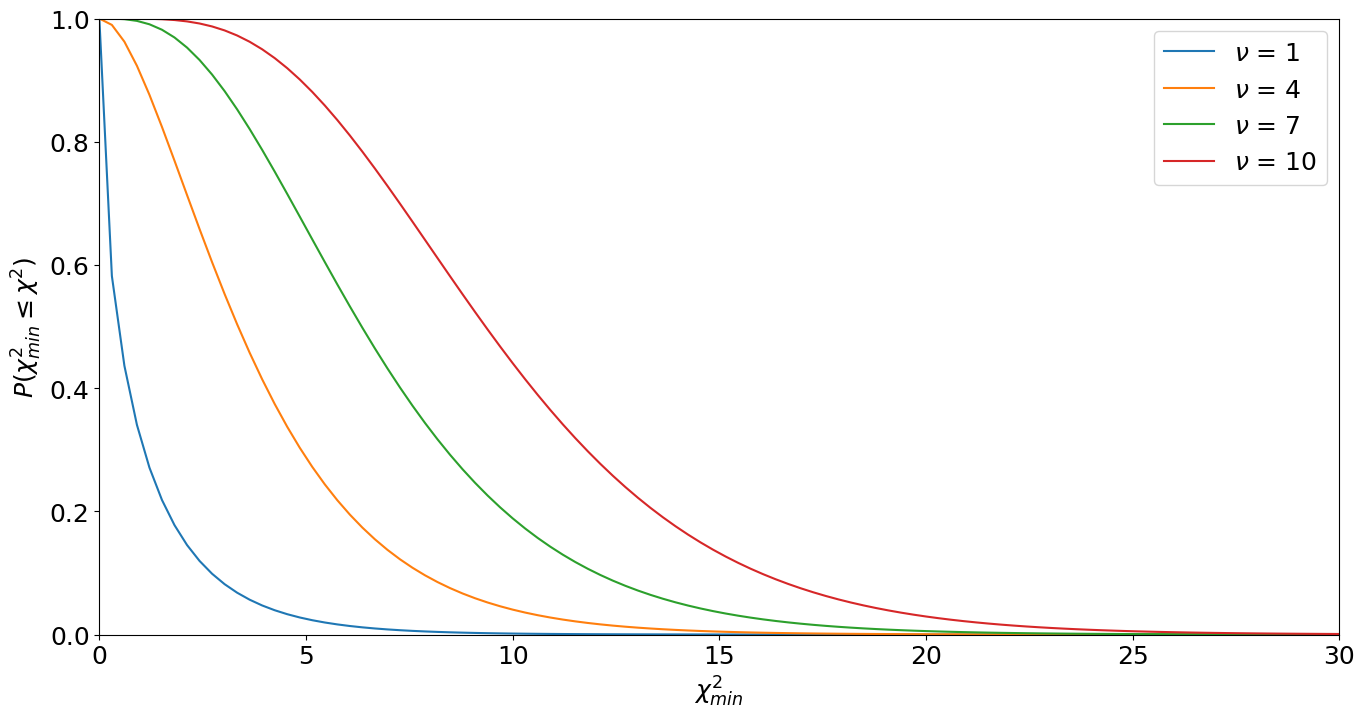

In [2]:
##### Definición de grados de libertad ####
num = 1    # grado de libertad menor
nuM = 10   # grado de libertad mayor
paso = 3
###########################################

import numpy as np
from scipy.stats import chi2
import pylab as plt
plt.rcParams.update({'font.size':18})

nu = np.arange(num, nuM +1, paso).astype(int) 

fig, ax = plt.subplots(1,figsize=(16,8))
for ii in nu:
    xs = np.linspace(1e-18,30,100)
    probC = 1- chi2.cdf(xs,ii)
    ax.plot(xs,probC,label=r'$\nu$ = {}'.format(ii))

ax.set_ylim(0,1.0)
ax.set_xlim(0,30)
ax.set_xlabel(r'$\chi^2_{min}$')
ax.set_ylabel(r'$P(\chi^2_{min} \leq \chi^2)$')
ax.legend()
#plt.savefig('imagenes/pdfChiCum.svg')
plt.show()

(subsec-bondadChiCuadrado)=
## Prueba de chi-cuadrado para una distribución de datos

Sea una distribución de $N$ datos $x_i$, de una variable aleatoria continua[^discreta], la hipótesis $H_0$ que se tiene es que dichos datos siguen una cierta distribución estadística definida por la función de densidad de probabilidad $f(x)$. Para poder comparar la distribución de datos con la distribución estadística el primer paso es organizar los datos en un histograma, lo cual obliga a definir un número $n \leq N$ de intervalos $h_i = x_i + \Delta x$. Una vez definidos los intervalos, el siguiente paso es contar cuantos datos se encuentran dentro del intervalo. El número total de datos $x_i$ dentro del intervalo $h_i$ será $O_i$. Al sumar los datos de cada intervalo se cumple

[^discreta]: Todo lo dicho aquí es válido para una variable discreta, simplemente usando los intervalos adecuados y las funciones de probabilidad definidas para funciones discretas.

$$ N = \sum_{i=1}^n O_i .$$ (ec-chi4)

Según la distribución estadística, para un intervalo $h_i$ el número de datos que se esperaría encontrar, si los datos realmente siguen dicha distribución, es

$$E_i = N\times \int_{x_i}^{x_i+\Delta x} f(x)\,dx .$$ (ec-chi5)

Como para cada intervalo se ha contado el número de datos, la incertidumbre esperada en el número de datos contados corresponde a $\sqrt{E_i}$[^poisson]. Con el fin de comparar el histograma de los datos con el histograma esperado, se define el parámetro

[^poisson]: Ver {numref}`subsec-conteo`.

$$ \chi^2_{min} = \sum_{i=1}^n \frac{ \big( E_i - O_i \big)^2}{E_i} ,$$ (ec-chi6)

qué es precisamente el estadístico *chi-cuadrado*. Determinado el valor de $\chi^2_{min}$ se calcula la probabilidad de obtener un $\chi^2$ igual o mayor usando la ecuación {eq}`ec-chi3`. Los valores comunmente aceptados para no rechazar la hipótesis $H_0$ son probabilidades mayores a $5\,\%$ (significativo) o $1\,\%$ (muy significativo). Otra forma de interpretarlo es decir que la hipótesis se rechaza con una confiabilidad significativa si la probabilidad es menor a $5\,\%$, o se rechaza con una confiabilidad muy significativa si la probabilidad es menor a $1\,\%$.

```{warning}
Note que la incertidumbre utilizada corresponde a un experimento de conteo, es decir, a una distribución de Poisson. Pero el estadístico *chi-cuadrado* está definido para una distribución normal. Para que la aproximación sea correcta se deberá garantizar un número mínimo de datos en cada intervalo, donde la diferencia entre la distribución normal y de Poisson sea despreciable. Un valor sugerido para el mínimo número de datos en cada intervalo es $5$ o más {cite}`Taylor1996`.
```
La advertencia anterior restringe el número de intervalos que se puede tener, en particular, no pueden existir intervalos que contengan menos de $5$ datos. Una restricción extra limita el número mínimo de intervalos: puesto que en la ecuación {eq}`ec-chi6` el número de variables corresponde al número de intervalos, *siempre se debe tener un número de intervalos superior al número de ligaduras de la muestra*, o en otras palabras, siempre se debe tener un número de variables independientes superior al número de ligaduras puesto que la distribución chi-cuadrado se define para grados de libertad desde uno en adelante[^gdl]. Para el caso de distribuciones, el número de ligaduras es igual a la ligadura dada por la ecuación {eq}`ec-chi4`, más el número de parámetros de la distribución que se deben determinar con los datos de la muestra.

[^gdl]: El número de grados de libertad se define como la diferencia entre el número de variables independientes y el número de ligaduras.

```{tip}
Para poder cumplir con las condiciones de la prueba de chi-cuadrado, es necesario tener una cantidad mínima de datos. Una regla que puede usar para saber cuantos datos necesita, es tener al menos $5$ datos por cada intervalo. Por ejemplo, si usted piensa que su distribución es normal, y que por lo tanto tendrá tres ligaduras y necesitará cuatro intervalos, la regla le indicaría que necesita una muestra de mínimo $20$ datos.
```


**Ejemplo**:

En la {numref}`subsec-histograma` se pidió verificar los diámetros de unas canicas. En aquel momento se realizó un histograma y se determinó la media y la desviación estándar, para dar información básica de como se distribuían los diámetros (ver {numref}`fig-histoCanicas`). Se obtuvo un diámetro promedio de $16.2\,\text{mm}$ y una desviación estándar de $0.3\,\text{mm}$. Hay buenas razones para pensar que los diámetros se distribuyen según una distribución normal, por lo que se quiere verificar si está hipótesis es cierta.

```{figure} imagenes/histoCanicas.svg
:name: fig-histoCanicas

Distribución de diámetros de un conjunto de canicas.
```

Como se quiere verificar que la distribución de los datos se corresponde con una distribución normal, el número de parámetros que se deben determinar con los datos de la muestra son dos: media y desviación estándar, luego el número de ligaduras es tres, y el número mínimo de intervalos será cuatro. El número de datos de la muestra es $26$, por lo que se cumple con la regla que establece un mínimo de $20$ datos. El histograma de la {numref}`fig-histoCanicas` tiene efectivamente $4$ intervalos, pero dos de ellos tienen menos de cinco datos, por lo que se tienen que redefinir los intervalos para cumplir la condición de mínimo $5$ datos en cada intervalo. Al redefinir los intervalos que cumplan la condición se obtiene la información presentada en la {numref}`tabla-histoCanicas` y el histograma de la {numref}`fig-histoCanicas2`.

```{list-table} Distribución de diámetros de las canicas
:header-rows: 1
:name: tabla-histoCanicas

* - Intervalo
  - Rango diámetros en intervalo
  - Número de observaciones $O_i$
  - Número de observaciones $E_i$
* - 1
  - $(15.50, 15.95)\,\text{mm}$
  - 6
  - 6.5
* - 2
  - $(15.96, 16.15)\,\text{mm}$
  - 6
  - 6.0
* - 3
  - $(16.16, 16.35)\,\text{mm}$
  - 5
  - 6.0
* - 4
  - $(16.36, 16.80)\,\text{mm}$
  - 7
  - 6.5
```

Usando la ecuación {eq}`ec-chi6` se obtiene $\chi^2_{min} = 0.23$, que para un grado de libertad, usando la ecuación {eq}`ec-chi3`, corresponde a una probabilidad de $63\,\%$. Luego se concluye que a partir de la muestra que se tiene no hay razón para rechazar la hipótesis de que la distribución de los datos se corresponde con una distribución normal. Es cierto que los intervalos escogidos no reflejan la forma típica de una distribución normal, por lo que si persisten dudas sobre la veracidad de la hipótesis se tendran que tomar más datos.

```{figure} imagenes/histoCanicas2.svg
:name: fig-histoCanicas2

Distribución de diámetros de un conjunto de canicas con intervalos que cumplen la regla de tener cinco o más repeticiones.
```

(subsec-calidadChiCuadrado)=
## Prueba de chi-cuadrado para la calidad del ajuste

Sea un conjunto de $N$ datos $y_i$, de una variable aleatoria dependiente, que les corresponde de forma inyectiva una variable aleatoria independiente $x_i$, la hipótesis $H_0$ que se tiene es que la función matemática definida como $\tilde y_i = f(x_i;m_j)$ donde $m_j$ son $n$ parámetros de la función ($n < N$), efectivamente describe los datos $y_i$ (se ajusta a los datos).

Con el fin de comparar los valores $y_i$ con los valores $\tilde y_i$ predichos por la función matemática, se define el parámetro

$$ \chi^2_{min} = \sum_{i=1}^N \frac{ \big( y_i - \tilde y_i \big)^2}{\alpha_i^2} ,$$ (ec-chi7)

qué es precisamente el estadístico *chi-cuadrado*. Aquí, $\alpha_i$ es la incertidumbre en la variable dependiente $y_i$. Determinado el valor de $\chi^2_{min}$ se calcula la probabilidad de obtener un $\chi^2$ igual o mayor usando la ecuación {eq}`ec-chi3`. Para este caso, los grados de libertad corresponden al número total de datos $N$, menos los $m_j$ parámetros que deben de ser calculados con los $N$ datos. Por otro lado, igual que en el caso para un histograma, los valores comunmente aceptados para no rechazar la hipótesis $H_0$ son probabilidades mayores a $5\,\%$ (significativo) o $1\,\%$ (muy significativo).

**Ejemplo**

Recordando el experimento de la {numref}`subsec-ejemploBola2` en el que se rodaba una bola sobre una superficie de caucho, en la {numref}`sec-AjusteNolineal` se encontraron los parámetros de velocidad inicial y desaceleración de la función $x = v_0 t + a t^2$ que se ajustaba a los datos (curva azul en la {numref}`fig-bolaChi1`). Pero también se podría haber ajustado una función lineal $x = v_0 t$ con un único parámetro, la velocidad inicial (línea verde en la {numref}`fig-bolaChi1`).

```{figure} imagenes/bolaChi1.svg
:name: fig-bolaChi1

Bola rodando sobre una superfie de caucho. Como incetidumbre de la posición se tomó la resolución del instrumento, mientras que para la incertidumbre del desplazamiento se usó la mitad de la mayor diferencia posible en la predicción del desplazamiento, según la incertidumbres en las posiciones. 
```

Se usará la prueba de chi-cuadrado para determinar si alguna de las hipótesis es falsa. Para la hipótesis de que la función que se ajusta a los datos es $x = v_0 t + a t^2$, usando la ecuación {eq}`ec-chi7` se encuentra el valor $\chi^2_{min} = 0.26$, y considerando para este caso $9$ grados de libertad la probabilidad de encontrar un $\chi^2$ igual o mayor es de $100.00\,\%$. Repitiendo el procedimiento para la hipótesis de que los datos se ajustan a la función $x = v_0 t$, $\chi^2_{min} = 6.17$, y la probabilidad para $10$ grados de libertad es $80.07\,\%$. En principio, el criterio de chi-cuadrado nos está diciendo que ambas hipótesis son válidas, pero el hecho de encontrar probabilidades tan grandes es un claro indicio de que las incertidumbres fueron *sobreestimadas*. Por lo tanto, es necesario volver a estimar las incertidumbres.

Para la nueva estimación de la incertidumbre se supondrá una distribución uniforme para la posición ({numref}`subsubsec-gum-pdfUniforme`), y se usará propagación de la incertidumbre para determinar la incetidumbre del desplazamiento ({numref}`subsec-errorPequeno`). La nueva incertidumbre, junto con los dos ajustes se presenta en la {numref}`fig-bolaChi2`.

```{figure} imagenes/bolaChi2.svg
:name: fig-bolaChi2

Bola rodando sobre una superfie de caucho. Como incetidumbre de la posición se consideró una distribución uniforme, mientras que para la incertidumbre del desplazamiento se usó propagación de las incertidumbres pequeñas. 
```

Verificando nuevamente las hipótesis, para  la función $x = v_0 t + a t^2$, $\chi^2_{min} = 8.90$, y la probabilidad de encontrar un $\chi^2$ igual o mayor es de $44.6\,\%$. Para la función $x = v_0 t$, $\chi^2_{min} = 194.9$, y la probabilidad es $0.0\,\%$. Es claro ahora que la hipótesis de que la función lineal $x = v_0 t$ se ajusta a los datos debe ser rechazada con una confiabilidad muy alta, mientras que la hipótesis de que la función no lineal  se ajusta a los datos no es rechazada. Luego podemos confiar que los datos se ajustan a una función no lineal $x = v_0 t + a t^2$, donde $v_0 = (71.0 \pm 0.8)\,\text{cm/s}$ y $a = (-9.0 \pm 0.7)\,\text{cm/s}^2$.


```{seealso}

Sobre la distribución de chi-cuadrado se puede consultar la sección 8.3 de {cite}`Hughes2010` o el capítulo 12 de {cite}`Taylor1996`. Sobre la hipótesis nula  se puede consultar la sección 8.1 y 8.6 de {cite}`Hughes2010`, la sección 10.6 de {cite}`Taylor1996` o la sección 1.4.4 de {cite}`Bevington`. Para la prueba de hipótesis con chi-cuadrado se puede consultar las secciónes 8.4 y 8.6 de {cite}`Hughes2010`, la sección 12.1 de {cite}`Taylor1996`, o las secciones 4.4, 6.4 y 6.5 de {cite}`Bevington`. Finalmente, para la prueba de bondad de chi-cuadrado se puede consultar las secciones 6.1 y 8.1 de {cite}`Hughes2010`, y el capítulo 11 de {cite}`Bevington`.

```